#Requirements
1. Numpy
2. Pandas
3. Scipy
4. matplotlib
5. seaborn
6. sklearn
7. plotly

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB


In [22]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Credit_default_dataset.csv")

In [4]:
#For easy Understanding changing some names
df.rename(columns={'default.payment.next.month':'defaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [5]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [6]:
fil = (df['MARRIAGE'] == 0)
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [9]:
X = df.drop('defaulter', axis=1)  
y = df['defaulter']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [15]:
features = df.drop('defaulter', axis = 1, inplace = False)
stdX = (features - features.mean()) / (features.std()) 
Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(stdX,y, test_size=0.2, stratify=y,
                                                                random_state=42)

In [17]:
Xstd_train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,-0.003096,-0.000922,0.002079,0.000313,0.002845,-0.005736,0.002291,-0.000265,-0.000599,-0.000570,...,-0.002181,-0.001652,-0.002418,-0.003287,-0.002416,-0.001788,-0.000563,-0.002282,-0.001927,0.000810
std,0.997837,0.998178,0.999561,1.000176,0.999749,0.997543,0.999425,1.001363,0.997743,0.993829,...,0.986367,0.995552,0.997215,0.995880,0.974947,0.879003,0.994695,0.961352,0.984957,1.004100
min,-1.731964,-1.213774,-1.234302,-1.131327,-1.068779,-1.571453,-1.764813,-1.558850,-1.532166,-1.521918,...,-1.564818,-1.936755,-2.000840,-6.355141,-0.341936,-0.256985,-0.296796,-0.308057,-0.314131,-0.293377
25%,-0.864481,-0.905483,-1.234302,-1.131327,-1.068779,-0.812061,-0.874977,-0.723558,-0.696652,-0.666588,...,-0.639676,-0.636237,-0.634329,-0.632144,-0.281561,-0.220528,-0.274646,-0.289482,-0.298030,-0.287752
50%,-0.003984,-0.211829,0.810147,0.211866,0.849116,-0.161154,0.014860,0.111734,0.138862,0.188743,...,-0.389076,-0.377077,-0.365295,-0.367376,-0.215119,-0.169575,-0.194252,-0.212310,-0.215952,-0.209001
75%,0.858823,0.558898,0.810147,0.211866,0.849116,0.598238,0.014860,0.111734,0.138862,0.188743,...,0.187754,0.172906,0.161699,0.169686,-0.038962,-0.039980,-0.036644,-0.051757,-0.049704,-0.068373
max,1.731964,6.416421,0.810147,2.898253,2.767012,4.286712,7.133555,6.794071,6.822977,7.031387,...,11.652199,13.186466,14.587189,15.495023,52.398341,52.495840,50.594438,39.331523,27.603166,29.444607


In [81]:
def model_eval(algo, Xtrain,ytrain,Xtest,ytest):
    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

    algo.fit(Xtrain,ytrain)
    y_pred = algo.predict(Xtrain)
    y_train_prob = algo.predict_proba(Xtrain)[:,1]

    #print('confusion matrix-train\n',confusion_matrix(ytrain,y_pred))
    print('Overall Train Accuracy',accuracy_score(ytrain,y_pred))
    print('Train AUC Score',roc_auc_score(ytrain,y_train_prob))

    y_test_pred = algo.predict(Xtest)
    y_test_prob = algo.predict_proba(Xtest)[:,1]


    #print('confusion matrix-test\n',confusion_matrix(ytest,y_test_pred))
    print('Overall Test Accuracy',accuracy_score(ytest,y_test_pred))
    print('Test AUC Score',roc_auc_score(ytest,y_test_prob))
    print('Classification Report of Test\n',  classification_report(ytest, y_test_pred))
    
    
    kf = KFold(n_splits = 5,shuffle = True,random_state = 42)
    score=[]
    for train_idx,test_idx in kf.split(Xtrain,ytrain):
        xtrain_k,xtest_k = Xtrain.iloc[train_idx,:],Xtrain.iloc[test_idx,:]
        ytrain_k,ytest_k = ytrain.iloc[train_idx],ytrain.iloc[test_idx]
        algo.fit(xtrain_k,ytrain_k)
        y_pred_k = algo.predict(xtest_k)
        roc = roc_auc_score(ytest_k,y_pred_k)
        score.append(roc)
    print('K-Fold scores: %0.03f (+/- %0.5f)' % (np.mean(score),np.var(score,ddof=1)))
    
    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(ytest,y_test_pred)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(ytest,y_test_prob)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    plt.show()
    
    return (accuracy_score(y_test, y_test_pred),precision_score(y_test, y_test_pred,average='weighted'),recall_score(y_test, y_test_pred,average='weighted')
    ,f1_score(y_test,y_test_pred,average='weighted'))

## Benchmark Model: Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
LR = LogisticRegression(random_state=0)

Overall Train Accuracy 0.8116666666666666
Train AUC Score 0.7281750486460723
Overall Test Accuracy 0.8085
Test AUC Score 0.7080713960540043
Classification Report of Test
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000

K-Fold scores: 0.610 (+/- 0.00004)


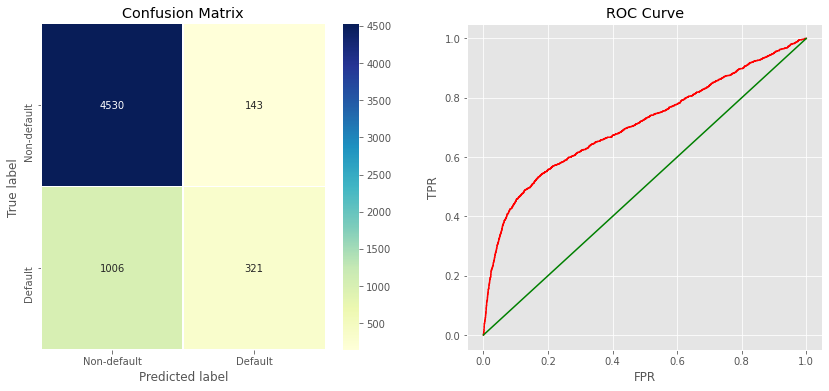

In [85]:
accuracy_LR,precision_LR, recall_LR, f1_score_LR = model_eval(LR,Xstd_train,ystd_train,Xstd_test,ystd_test )

# Different Models

### 1. Naive Bayes

In [33]:
clf = GaussianNB()

Overall Train Accuracy 0.7610833333333333
Train AUC Score 0.7376066480111829
Overall Test Accuracy 0.7518333333333334
Test AUC Score 0.7249971819384103
Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.81      0.84      4673
           1       0.45      0.55      0.50      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.68      0.67      6000
weighted avg       0.77      0.75      0.76      6000

K-Fold scores: 0.698 (+/- 0.00001)


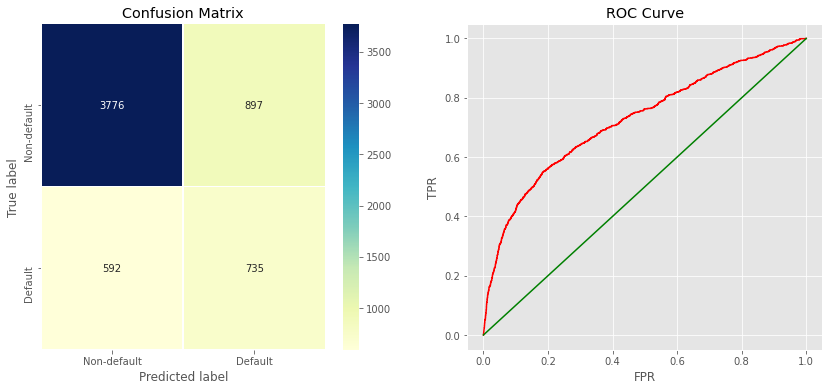

In [86]:
accuracy_NB,precision_NB, recall_NB, f1_score_NB = model_eval(clf,Xstd_train,ystd_train,Xstd_test,ystd_test )

### 2. KNN

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)

Overall Train Accuracy 0.842625
Train AUC Score 0.878346297876362
Overall Test Accuracy 0.7931666666666667
Test AUC Score 0.6937145212496357
Classification Report of Test
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      4673
           1       0.55      0.34      0.42      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.63      0.65      6000
weighted avg       0.77      0.79      0.77      6000

K-Fold scores: 0.632 (+/- 0.00003)


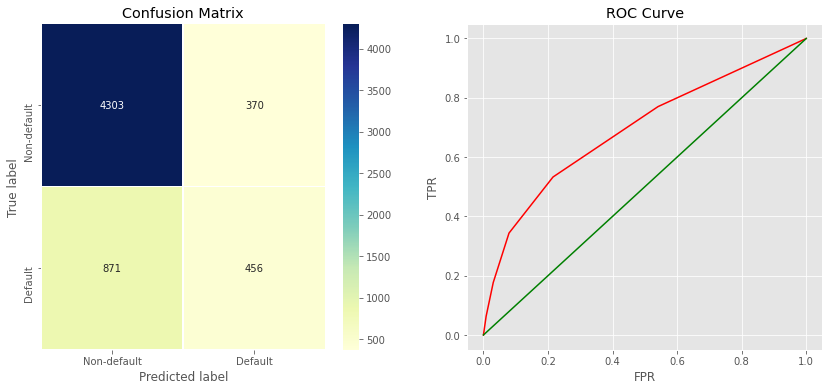

In [87]:
accuracy_KNN,precision_KNN, recall_KNN, f1_score_KNN = model_eval(knn, Xstd_train,ystd_train,Xstd_test,ystd_test)

### 3. Decision Trees

In [88]:
DT = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, 
                                     max_features= 7, min_samples_leaf= 8, 
                                     random_state=0)

Overall Train Accuracy 0.8087083333333334
Train AUC Score 0.72304791633711
Overall Test Accuracy 0.8046666666666666
Test AUC Score 0.707732664244612
Classification Report of Test
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      4673
           1       0.63      0.28      0.39      1327

    accuracy                           0.80      6000
   macro avg       0.73      0.62      0.64      6000
weighted avg       0.78      0.80      0.77      6000

K-Fold scores: 0.647 (+/- 0.00016)


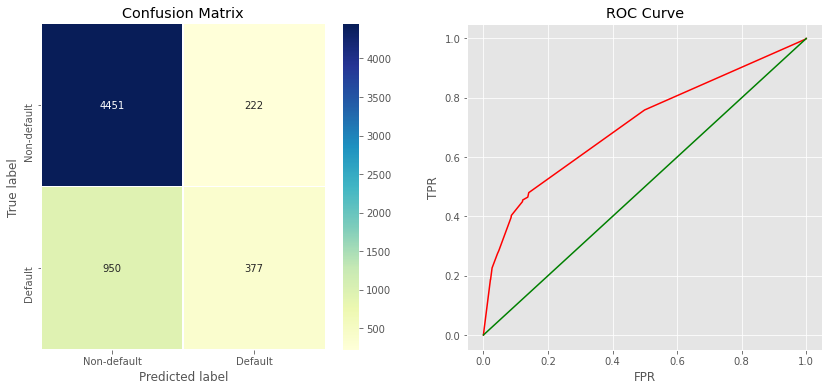

In [89]:
accuracy_DT,precision_DT, recall_DT, f1_score_DT = model_eval(DT, Xstd_train,ystd_train,Xstd_test,ystd_test)

### 4. Random Forest

In [92]:
RF = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0)

Overall Train Accuracy 0.828625
Train AUC Score 0.7928145372292167
Overall Test Accuracy 0.8161666666666667
Test AUC Score 0.7716562993715117
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.34      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000

K-Fold scores: 0.652 (+/- 0.00004)


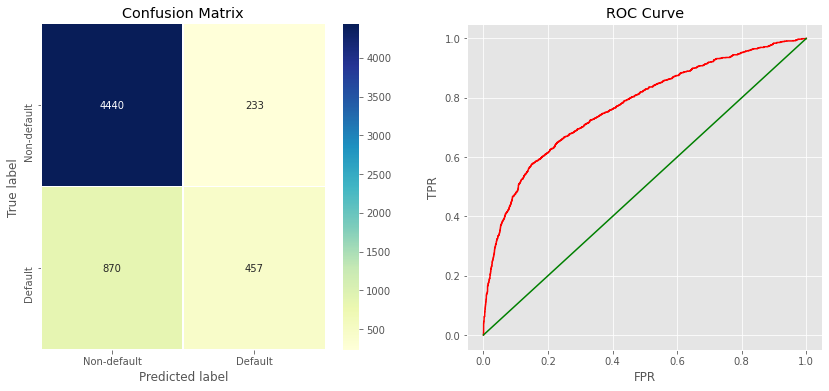

In [93]:
accuracy_RF,precision_RF, recall_RF, f1_score_RF = model_eval(RF, Xstd_train,ystd_train,Xstd_test,ystd_test)

### 5. GradientBoostingClassifier

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=10)

Overall Train Accuracy 0.8274166666666667
Train AUC Score 0.8071778249995849
Overall Test Accuracy 0.8196666666666667
Test AUC Score 0.7791634703102093
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

K-Fold scores: 0.660 (+/- 0.00003)


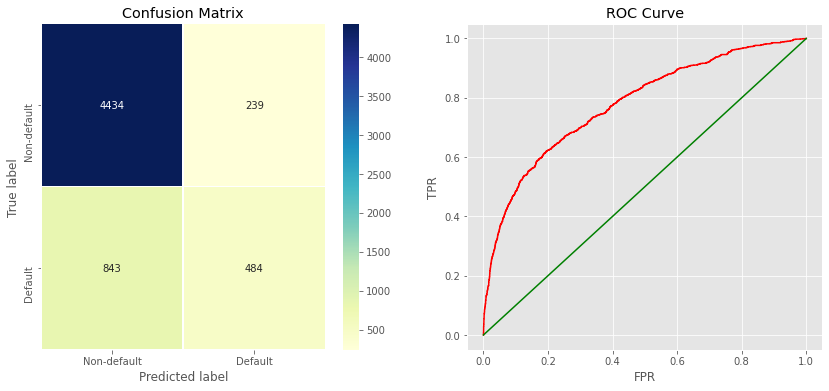

In [96]:
accuracy_GBC,precision_GBC, recall_GBC, f1_score_GBC = model_eval(GBC, Xstd_train,ystd_train,Xstd_test,ystd_test)

### 6. AdaBoostClassifier

In [97]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(random_state=10)

Overall Train Accuracy 0.8194583333333333
Train AUC Score 0.7865705307859974
Overall Test Accuracy 0.816
Test AUC Score 0.7710336649910958
Classification Report of Test
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.67      0.32      0.44      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000

K-Fold scores: 0.642 (+/- 0.00006)


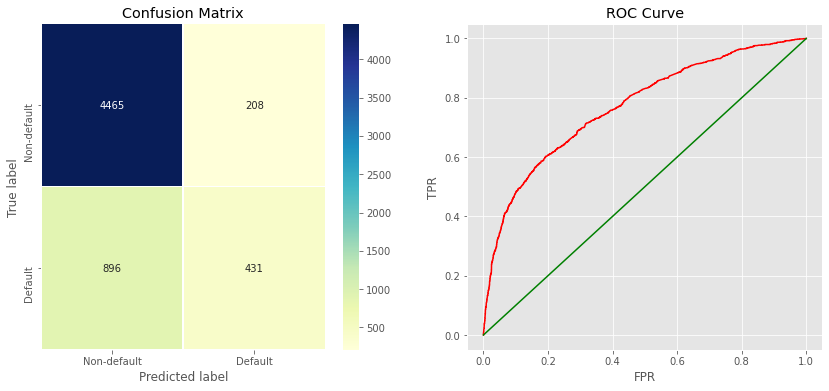

In [98]:
accuracy_ABC,precision_ABC, recall_ABC, f1_score_ABC = model_eval(ABC, Xstd_train,ystd_train,Xstd_test,ystd_test)

### 7. VotingClassifier

In [99]:
from sklearn.ensemble import VotingClassifier
VC = VotingClassifier(estimators=[('rf',RF),('gb', GBC),('ab',ABC)],voting='soft')


Overall Train Accuracy 0.8276666666666667
Train AUC Score 0.8032483887341151
Overall Test Accuracy 0.8186666666666667
Test AUC Score 0.7775776958528615
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

K-Fold scores: 0.659 (+/- 0.00004)


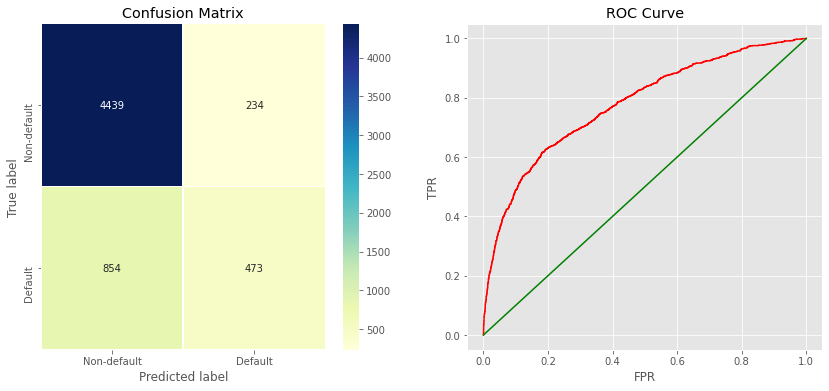

In [100]:
accuracy_VC,precision_VC, recall_VC, f1_score_VC = model_eval(VC, Xstd_train,ystd_train,Xstd_test,ystd_test)

# Comparison

In [101]:
list_accuracy=[]
list_accuracy.append(accuracy_LR)
list_accuracy.append(accuracy_NB)
list_accuracy.append(accuracy_KNN)
list_accuracy.append(accuracy_DT)
list_accuracy.append(accuracy_RF)
list_accuracy.append(accuracy_GBC)
list_accuracy.append(accuracy_ABC)
list_accuracy.append(accuracy_VC)

In [102]:
list_precision=[]
list_precision.append(precision_LR)
list_precision.append(precision_NB)
list_precision.append(precision_KNN)
list_precision.append(precision_DT)
list_precision.append(precision_RF)
list_precision.append(precision_GBC)
list_precision.append(precision_ABC)
list_precision.append(precision_VC)

In [103]:
list_recall=[]
list_recall.append(recall_LR)
list_recall.append(recall_NB)
list_recall.append(recall_KNN)
list_recall.append(recall_DT)
list_recall.append(recall_RF)
list_recall.append(recall_GBC)
list_recall.append(recall_ABC)
list_recall.append(recall_VC)

In [104]:
list_f1_score=[]
list_f1_score.append(f1_score_LR)
list_f1_score.append(f1_score_NB)
list_f1_score.append(f1_score_KNN)
list_f1_score.append(f1_score_DT)
list_f1_score.append(f1_score_RF)
list_f1_score.append(f1_score_GBC)
list_f1_score.append(f1_score_ABC)
list_f1_score.append(f1_score_VC)

In [105]:
##Comapare Accuracy

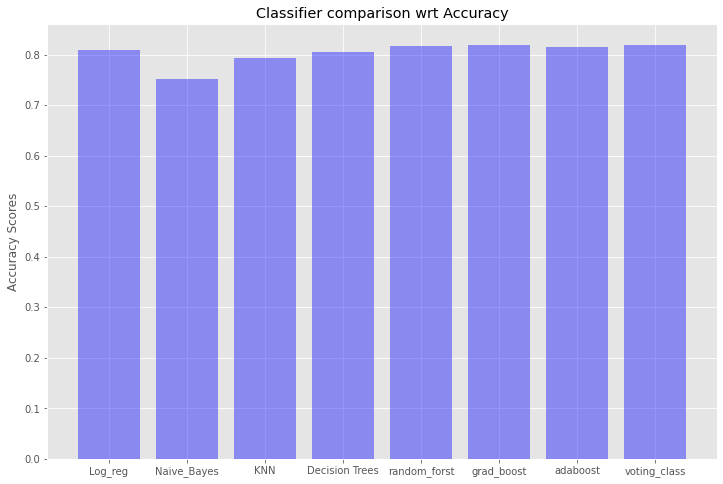

In [122]:
import matplotlib.pyplot as plt
classifier_names=('Log_reg','Naive_Bayes','KNN',"Decision Trees",'random_forst','grad_boost','adaboost','voting_class')
y_axis=np.arange(len(classifier_names))
plt.figure(figsize=(12,8))
plt.bar(y_axis, list_accuracy, alpha=0.4,color='Blue',ecolor='navy')
plt.xticks(y_axis, classifier_names)
plt.ylabel('Accuracy Scores')
plt.title('Classifier comparison wrt Accuracy')
plt.show()

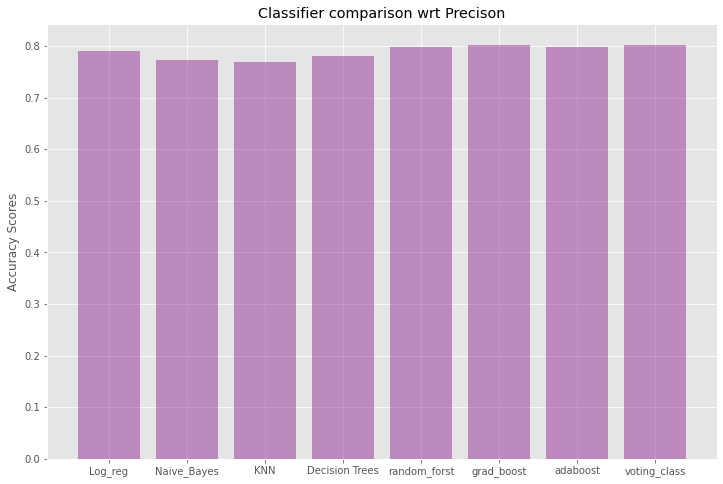

In [121]:
import matplotlib.pyplot as plt
classifier_names=('Log_reg','Naive_Bayes','KNN',"Decision Trees",'random_forst','grad_boost','adaboost','voting_class')
y_axis=np.arange(len(classifier_names))
plt.figure(figsize=(12,8))
plt.bar(y_axis, list_precision, alpha=0.4,color='Purple',ecolor='darkgreen')
plt.xticks(y_axis, classifier_names)
plt.ylabel('Accuracy Scores')
plt.title('Classifier comparison wrt Precison')
plt.show()

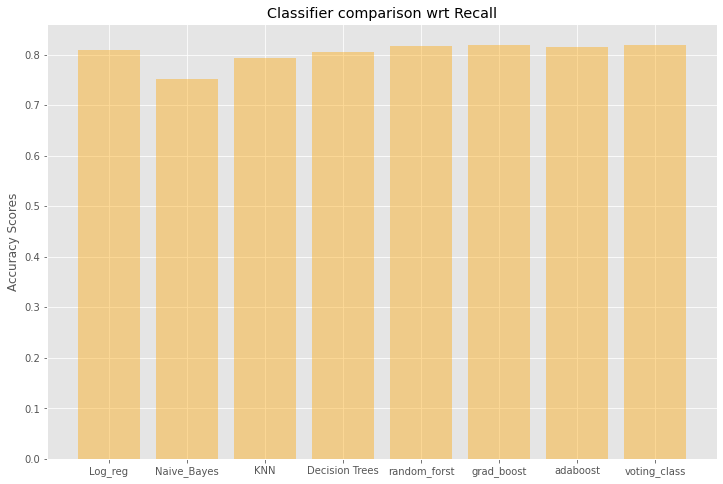

In [120]:
import matplotlib.pyplot as plt
classifier_names=('Log_reg','Naive_Bayes','KNN',"Decision Trees",'random_forst','grad_boost','adaboost','voting_class')
y_axis=np.arange(len(classifier_names))
plt.figure(figsize=(12,8))
plt.bar(y_axis, list_recall, alpha=0.4,color='orange',ecolor='black')
plt.xticks(y_axis, classifier_names)
plt.ylabel('Accuracy Scores')
plt.title('Classifier comparison wrt Recall')
plt.show()

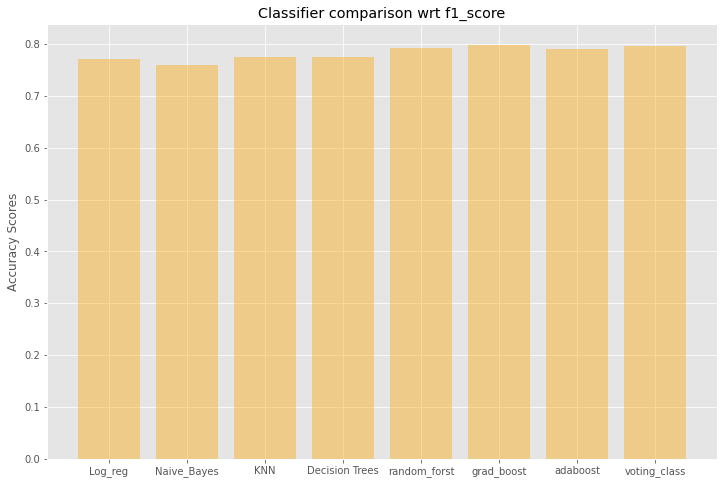

In [119]:
import matplotlib.pyplot as plt
classifier_names=('Log_reg','Naive_Bayes','KNN',"Decision Trees",'random_forst','grad_boost','adaboost','voting_class')
y_axis=np.arange(len(classifier_names))
plt.figure(figsize=(12,8))
plt.bar(y_axis, list_f1_score, alpha=0.4,color='orange',ecolor='black')
plt.xticks(y_axis, classifier_names)
plt.ylabel('Accuracy Scores')
plt.title('Classifier comparison wrt f1_score')
plt.show()

### Neural Networks

In [123]:
from keras.initializers import glorot_uniform
import keras
from keras.models import Sequential
from keras.layers import Dense

In [186]:
hl   = 4                  # number of hidden layer
nohl = [50,30,20,10]     # number of neurons in each hidden layer

classifier = Sequential()

# Hidden Layer
for i in range(hl):
    if i==0:
        classifier.add(Dense(units=nohl[i], input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
    else :
        classifier.add(Dense(units=nohl[i], kernel_initializer=glorot_uniform(seed=0), activation='relu'))

# Output Layer
classifier.add(Dense(units=1, kernel_initializer=glorot_uniform(seed=0), activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [187]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                1250      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_8 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 3,621
Trainable params: 3,621
Non-trainable params: 0
_________________________________________________________________


In [188]:
classifier.fit(Xstd_train, ystd_train, epochs=60, batch_size=512)

Epoch 1/60
47/47 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.7602
Epoch 2/60
47/47 [==============================] - 0s 1ms/step - loss: 0.4763 - accuracy: 0.8093
Epoch 3/60
47/47 [==============================] - 0s 2ms/step - loss: 0.4487 - accuracy: 0.8167
Epoch 4/60
47/47 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.8189
Epoch 5/60
47/47 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.8196
Epoch 6/60
47/47 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.8202
Epoch 7/60
47/47 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8208
Epoch 8/60
47/47 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.8210
Epoch 9/60
47/47 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.8219
Epoch 10/60
47/47 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8226
Epoch 11/60
47/47 [

In [189]:
y_pred = classifier.predict(Xstd_test)
y_pred = (y_pred > 0.5)
conf_matr = confusion_matrix(ystd_test, y_pred)


<AxesSubplot:>

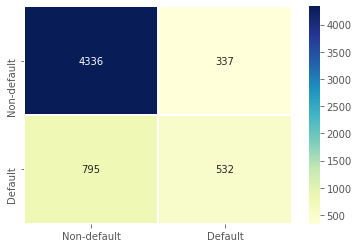

In [190]:
sns.heatmap(conf_matr,annot=True, cmap='YlGnBu', fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'],linewidths=.5)

In [191]:
print('Classification Report of Test\n',  classification_report(ystd_test, y_pred))

Classification Report of Test
               precision    recall  f1-score   support

           0       0.85      0.93      0.88      4673
           1       0.61      0.40      0.48      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.79      0.81      0.80      6000



## Some Tuning of parameter of model Random Forest, Adaboost, GradientBoost

1. Random Forest and GradientBoost

In [203]:
parameters_boost ={'n_estimators' :[15,25,50],
             'min_samples_split' :[3,10,15]
}

GBC_refine = GridSearchCV(GradientBoostingClassifier(random_state=10), cv=10, param_grid=parameters_boost, scoring='accuracy')
GBC_refine.fit(Xstd_train,ystd_train)
print("Best parameters for GradeintBoosting:",GBC_refine.best_params_)


RF_refine = GridSearchCV(RandomForestClassifier(random_state=10), cv=10, param_grid=parameters_boost,scoring='accuracy')
RF_refine.fit(Xstd_train,ystd_train)
print("Best parameters for RandomForest:",RF_refine.best_params_)

Best parameters for GradeintBoosting: {'min_samples_split': 3, 'n_estimators': 25}
Best parameters for RandomForest: {'min_samples_split': 15, 'n_estimators': 50}


2. Adaboost

In [204]:
parameters_ada ={'n_estimators' :[15,25,50],
            }
ABC_refine = GridSearchCV(AdaBoostClassifier(random_state=10), parameters_ada,cv=10,scoring='accuracy')
ABC_refine.fit(Xstd_train, ystd_train)
print("Best parameters for Adaboost:",ABC_refine.best_params_)

Best parameters for Adaboost: {'n_estimators': 50}


In [210]:
from sklearn.calibration import CalibratedClassifierCV
clfvc1 = RandomForestClassifier(n_estimators=50,min_samples_split=15,random_state=10)
clfvc2=AdaBoostClassifier(n_estimators=50,random_state=10)
clfvc3=GradientBoostingClassifier(n_estimators=25,min_samples_split=3,random_state=10)

In [211]:
clf_isotonic1 = CalibratedClassifierCV(clfvc1, method='isotonic',cv=10)
clf_isotonic2 = CalibratedClassifierCV(clfvc2, method='isotonic',cv=10)
clf_isotonic3 = CalibratedClassifierCV(clfvc3, method='isotonic',cv=10)

In [212]:
VC_refine = VotingClassifier(estimators=[('rf',clf_isotonic1),('ab', clf_isotonic2),('gb',clf_isotonic3)],voting='soft',weights=[1,1,1])
VC_refine.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              CalibratedClassifierCV(base_estimator=RandomForestClassifier(min_samples_split=15,
                                                                                           n_estimators=50,
                                                                                           random_state=10),
                                                     cv=10,
                                                     method='isotonic')),
                             ('ab',
                              CalibratedClassifierCV(base_estimator=AdaBoostClassifier(random_state=10),
                                                     cv=10,
                                                     method='isotonic')),
                             ('gb',
                              CalibratedClassifierCV(base_estimator=GradientBoostingClassifier(min_samples_split=3,
                                                                         

<AxesSubplot:>

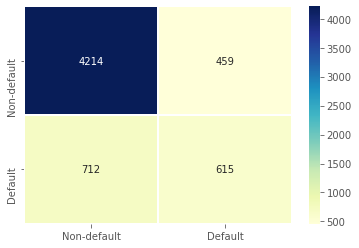

In [213]:
y_pred = VC_refine.predict(Xstd_test)
conf_matr = confusion_matrix(ystd_test, y_pred)
sns.heatmap(conf_matr,annot=True, cmap='YlGnBu', fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'],linewidths=.5)

In [214]:
print('Classification Report of Test\n',  classification_report(ystd_test, y_pred))

Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      4673
           1       0.57      0.46      0.51      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.68      0.70      6000
weighted avg       0.79      0.80      0.80      6000

